In [0]:
import funciones
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops, regionprops_table, find_contours
import numpy as np
import cv2
import os


# Sector specified by the user

In [0]:
coordinatesStr = '[(2, 296), (1496, 918)]'
## Turn string [(x, y), (w,z)] into numb [x,y,w,z]
coordinatesStr = coordinatesStr.strip('][').strip('()')
coordinatesStr = coordinatesStr.split(',')
coordinatesStr[1] = coordinatesStr[1].strip(')')
coordinatesStr[2] = coordinatesStr[2].strip(' (')
coordinatesStr = [int(i) for i in coordinatesStr]


# Sampling the video into 10 frames

In [0]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
StackRestaImagenes, frames = funciones.Analizar_Video('/content/08120307.MP4', coordinatesStr)


In [42]:
frames.shape

(10, 622, 1494)

# Background substraction through LMTD (Local Mean Temporal Differences)

In [0]:

StackRestaImagenes, Z = funciones.unrolling(frames, StackRestaImagenes) # Z = local median Image, StackRestaImagenes = local median absolute substraction image
      

In [44]:
StackRestaImagenes.shape

(10, 622, 1494)

In [0]:
# Some preliminary results

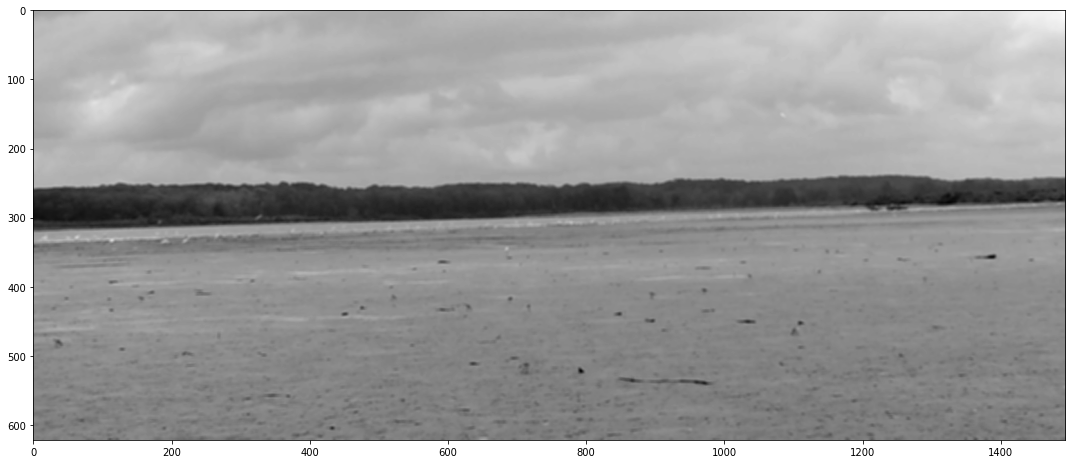

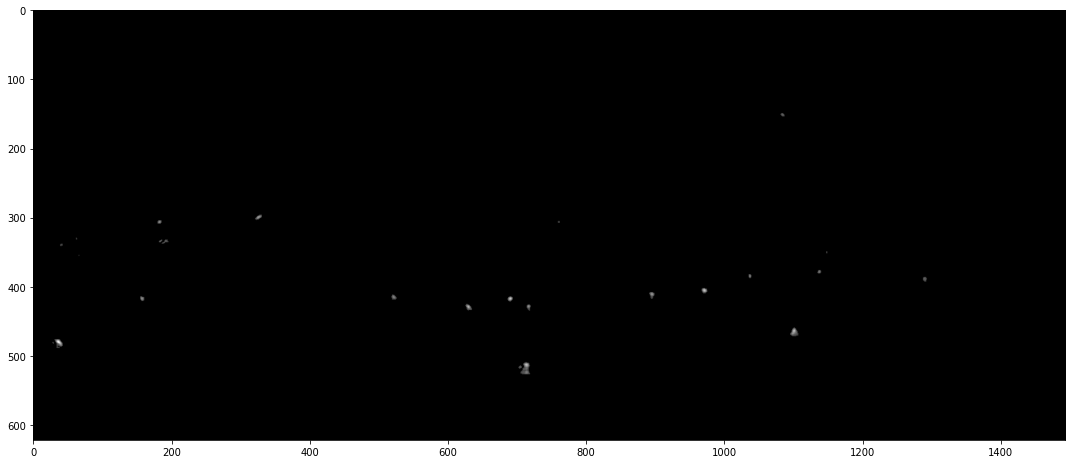

(<matplotlib.image.AxesImage at 0x7f3ead3c4a90>, None)

In [46]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(frames[9], cmap='gray'), plt.show()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(StackRestaImagenes[9], cmap='gray'), plt.show()

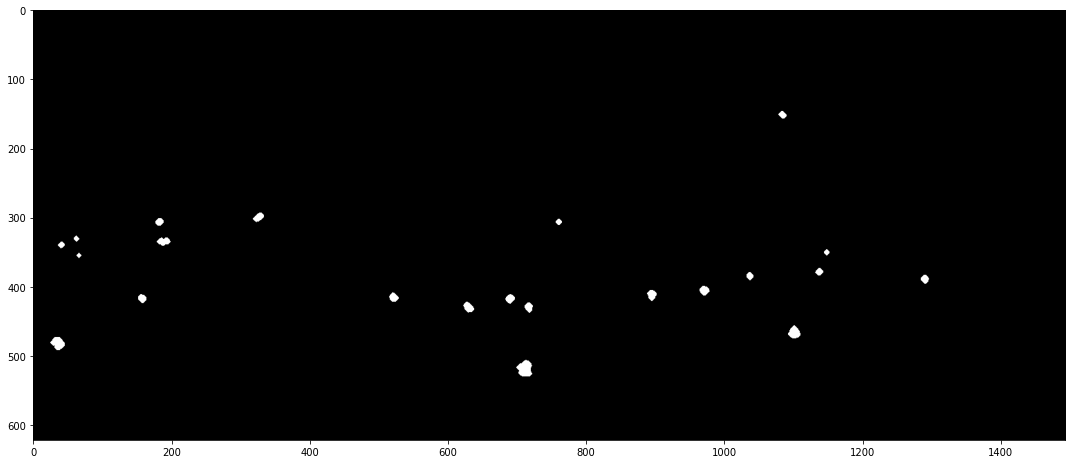

19

In [47]:

fil, col = StackRestaImagenes[0].shape
base_area = 0.1*(col*3) # criteria for erase rare objects
i = 9 #sample

#dilation process
dilation = StackRestaImagenes[i]/1.0
dilation = dilation/np.max(dilation)
dilation = dilation*255
dilation = cv2.dilate(dilation,kernel,iterations = 3)
dil = dilation
dil = dil > 0
dilation = dil


#Filter
for j in range(fil):
      if( np.sum( dilation[j:j+3,:] ) >= base_area):
            dilation[j:j+10,:] = 0*dilation[j:j+10,:]
      j = j + 10
dilation = dilation*255 

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(dilation, cmap='gray'), plt.show()

# Find objects
label_img = label(dilation.astype(np.uint8))
regions = regionprops(label_img)
X = funciones.filtroAreas(regions)
len(X["X1"])



In [0]:
def Mostrar_Boxes(im2, New_Coordinates):

    '''
    THIS FUNCTION GENERATES AN IMAGE WITH THE BOUNDING BOXES AND THE SCORES ON IT.
    '''

    img2 = im2.copy()
    for i in range(len(New_Coordinates["X1"])):
    	#Reading coordinates
        x1pp =  New_Coordinates["X1"][i] 
        x2pp =  New_Coordinates["X2"][i] 
        y1pp =  New_Coordinates["Y1"][i] 
        y2pp =  New_Coordinates["Y2"][i] 
        cv2.rectangle(img2, (y1pp, x1pp), (y2pp, x2pp),
        (255, 0, 0) , 1)

    return img2

# Final Result

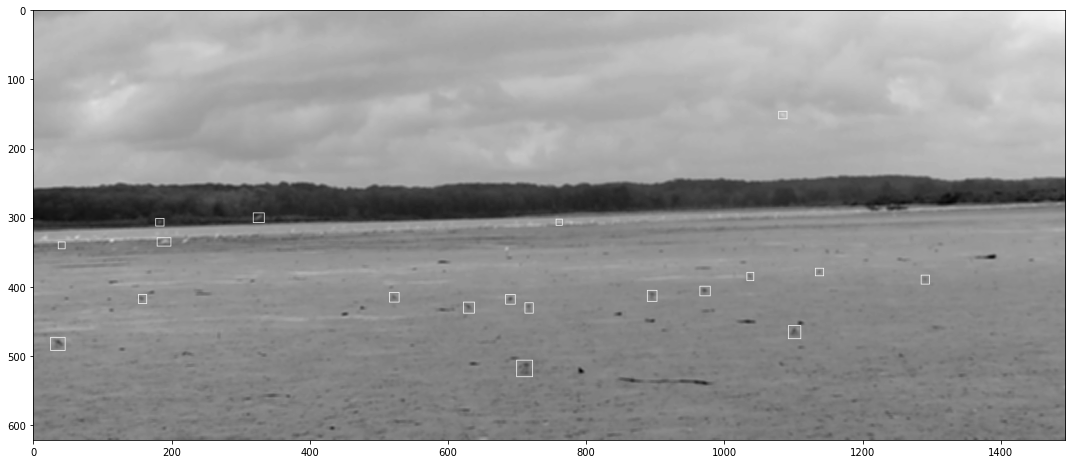

(<matplotlib.image.AxesImage at 0x7f3ead349438>, None)

In [50]:
imT = Mostrar_Boxes(frames[9], X)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(imT, cmap='gray'), plt.show()